# 统计训练集 测试集中每个子类别的样本数量

In [1]:
import os

label2nums = {
    'NILM': 0,
    'ASC-US': 1,
    'ASC-H': 2,
    'LSIL': 3,
    'HSIL+T': 4,
    'HSIL': 5,
    'AGC': 6
}

label_dir = 'labels'
file_names = ['train_label.csv', 'val_label.csv', 'test_label.csv']
labels = list(label2nums.keys())
labels_num = len(labels)

def count_files(file_name):
    counts = [0] * labels_num
    file_path = os.path.join(label_dir, file_name)
    with open(file_path, 'r') as f:
        for line in f.readlines():
            wsi_name, wsi_label = line.strip().split(',')
            for label in labels:
                flag = 0
                if label in wsi_name:
                    flag = 1
                    counts[label2nums[label]] += 1
                    # counts[label2nums[label]].append(wsi_name)
                    break
            if flag == 0:
                # print(wsi_name)
                counts[0] += 1
    f.close()
    return counts

counts = [0] * labels_num
print("=============all labels")
for file_name in file_names:
    counts_one = count_files(file_name)
    counts = [x+y for x,y in zip(counts_one, counts)]
                
for i in range(len(counts)):
    print(labels[i], counts[i])

print("=============test labels")
counts_test = count_files('test_label.csv')
for i in range(len(counts_test)):
    print(labels[i], counts_test[i])

=============all labels
NILM 1542
ASC-US 741
ASC-H 34
LSIL 273
HSIL+T 1
HSIL 33
AGC 1
=============test labels
NILM 462
ASC-US 229
ASC-H 13
LSIL 72
HSIL+T 0
HSIL 10
AGC 0


# 统计一个WSI中patch最多和最少数量

In [2]:
import os, glob

data_dir = '/home1/wsi/gc-224/'
sub_dirs = ['NILM', 'POS']
wsi_paths = []
for sub_dir in sub_dirs:
    wsi_paths.extend(glob.glob(os.path.join(data_dir, sub_dir, '*')))
wsi_patch_nums = []
for wsi_path in wsi_paths:
    wsi_patch_nums.append(len(glob.glob(os.path.join(wsi_path, '*'))))
    
print(f'max:{max(wsi_patch_nums)}, min:{min(wsi_patch_nums)}, mean:{sum(wsi_patch_nums)/len(wsi_patch_nums)}')


max:1395, min:126, mean:757.9984761904761


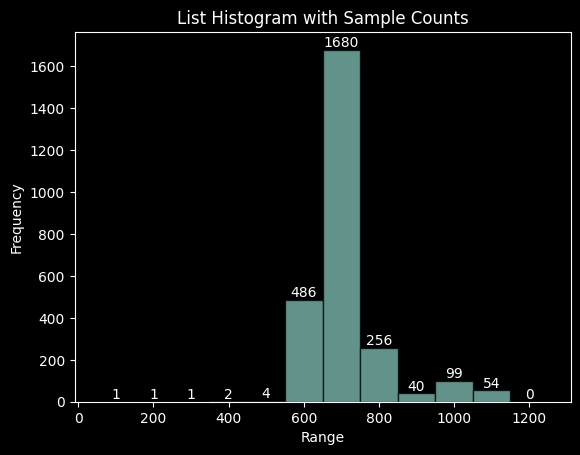

In [6]:
import matplotlib.pyplot as plt

# 示例列表
data = wsi_patch_nums

# 定义范围
bins = range(100, 1400, 100)  # 

# 生成直方图并获取柱的值
counts, edges, patches = plt.hist(data, bins=bins, align='left', edgecolor='black', alpha=0.7)

# 在每个柱上添加样本数
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), str(int(count)), ha='center', va='bottom')

# 设置标题和标签
plt.title('List Histogram with Sample Counts')
plt.xlabel('Range')
plt.ylabel('Frequency')

# 显示直方图
plt.show()


# 统计二分类中每个类别的样本数量

In [2]:
input_paths=['labels/train_val.csv',
'labels/test_label.csv'
]

for input_path in input_paths:
    print(input_path)
    neg_count = 0
    pos_count = 0
    with open(input_path, 'r') as f:
        for line in f.readlines():
            wsi_name, wsi_label = line.strip().split(',')
            if wsi_label == '0':
                neg_count += 1
            else:
                pos_count += 1
    print(f'neg:{neg_count}, pos:{pos_count}')


labels/train_val.csv
neg:1080, pos:759
labels/test_label.csv
neg:462, pos:324


# 构造多分类标签文件

In [14]:
import csv

subtypes = ['NILM', 'ASC-US', 'LSIL', 'ASC-H', 'HSIL', 'AGC']
two_label_dir = 'labels/'
n_label_dir = 'n-labels/'
sub_dirs=['train_val.csv','test_label.csv']

for sub_dir in sub_dirs:
    two_label_path = os.path.join(two_label_dir, sub_dir)
    n_label_path = os.path.join(n_label_dir, sub_dir)
    with open(two_label_path, 'r') as csvfile:
        print(f'==================================\033[35m{sub_dir}\033[0m==================================')
        with open(n_label_path, 'w') as n_csvfile:
            csv_reader = csv.reader(csvfile)
            csv_writer = csv.writer(n_csvfile)
            for row in csv_reader:
                wsi_name = row[0]
                if 'AGC' in wsi_name:
                    continue
                for i, subtype in enumerate(subtypes):
                    if subtype in wsi_name:
                        csv_writer.writerow([wsi_name, i])
                        break
                    if i == len(subtypes) - 1:
                        csv_writer.writerow([wsi_name, 0])
                        print('{} has not been classified, it has been classified as 0!'.format(wsi_name))
        n_csvfile.close()
    csvfile.close()

==================================train_val.csv==================================
202000787 has not been classified, it has been classified as 0!
202000838 has not been classified, it has been classified as 0!
202000952 has not been classified, it has been classified as 0!
202000822 has not been classified, it has been classified as 0!
202000883 has not been classified, it has been classified as 0!
202000882 has not been classified, it has been classified as 0!
202000953 has not been classified, it has been classified as 0!
202000936 has not been classified, it has been classified as 0!
202000933 has not been classified, it has been classified as 0!
202000789 has not been classified, it has been classified as 0!
202000817 has not been classified, it has been classified as 0!
202000889 has not been classified, it has been classified as 0!
202000914 has not been classified, it has been classified as 0!
202000773 has not been classified, it has been classified as 0!
202000877 has not been

# 统计构造的多分类标签文件中每个类别的样本数量

In [15]:
import csv

n_label_dir = 'n-labels/'
sub_dirs=['train_val.csv','test_label.csv']
subtypes = ['NILM', 'ASC-US', 'LSIL', 'ASC-H', 'HSIL', 'AGC']
for sub_dir in sub_dirs:
    n_label_path = os.path.join(n_label_dir, sub_dir)
    count = [0] * len(subtypes)
    with open(n_label_path, 'r') as csvfile:
        print(f'==================================\033[35m{sub_dir}\033[0m==================================')
        n_label_path = os.path.join(n_label_dir, sub_dir)
        with open(n_label_path, 'r') as n_csvfile:
            csv_reader = csv.reader(n_csvfile)
            for row in csv_reader:
                label = int(row[1])
                count[label] += 1
            n_csvfile.close()
    for i in range(len(subtypes)):
        print(f'{subtypes[i]}:{count[i]}')

==================================train_val.csv==================================
NILM:1080
ASC-US:512
LSIL:201
ASC-H:21
HSIL:24
AGC:0
==================================test_label.csv==================================
NILM:462
ASC-US:229
LSIL:72
ASC-H:13
HSIL:10
AGC:0
